# 机器翻译与数据集



## 1. 机器翻译概述
机器翻译（Machine Translation, MT）是将一种语言的文本自动翻译成另一种语言的任务。它是自然语言处理（NLP）中的一个重要应用，也是深度学习中的一个经典问题。机器翻译的目标是构建一个模型，能够自动将源语言（source language）的句子翻译成目标语言（target language）的句子。

## 2. 传统方法与现代方法
- **传统方法**：早期的机器翻译系统主要基于规则和统计方法。规则-based方法依赖于语言学规则和词典，而统计-based方法则依赖于大量的双语语料库，通过统计模型（如n-gram模型）进行翻译。
  
- **现代方法**：现代机器翻译系统主要基于神经网络，尤其是循环神经网络（RNN）和其变体（如LSTM、GRU）。近年来，Transformer模型（基于注意力机制）已经成为机器翻译的主流模型。

## 3. 数据集
机器翻译模型的训练需要大量的双语平行语料库（parallel corpus），即源语言和目标语言的句子对。常用的数据集包括：
- **WMT（Workshop on Statistical Machine Translation）**：一个国际性的机器翻译评测会议，提供了多种语言对的平行语料库。
- **IWSLT（International Workshop on Spoken Language Translation）**：专注于口语翻译的数据集。
- **OpenSubtitles**：从电影字幕中提取的双语语料库。
- **TED Talks**：TED演讲的双语字幕数据集。

## 4. 数据预处理
在训练机器翻译模型之前，通常需要对数据进行预处理：
- **分词（Tokenization）**：将句子分解成单词或子词单元（subword units）。对于某些语言（如中文），分词是必要的。
- **词汇表构建（Vocabulary Building）**：根据训练数据构建词汇表，通常使用字节对编码（Byte Pair Encoding, BPE）或WordPiece等方法。
- **填充与截断（Padding and Truncation）**：为了处理不同长度的句子，通常会对句子进行填充或截断，使其长度一致。

## 5. 模型架构
现代机器翻译模型通常基于以下架构：
- **编码器-解码器架构（Encoder-Decoder Architecture）**：编码器将源语言句子编码成一个固定长度的向量，解码器根据这个向量生成目标语言句子。
- **注意力机制（Attention Mechanism）**：为了解决长句子翻译中的信息丢失问题，注意力机制允许解码器在生成每个词时关注源句子的不同部分。
- **Transformer模型**：Transformer模型完全基于注意力机制，摒弃了传统的循环结构，能够并行处理输入序列，大大提高了训练效率。

## 6. 训练与评估
- **训练**：机器翻译模型的训练通常使用最大似然估计（Maximum Likelihood Estimation, MLE），即最大化目标句子的条件概率。常用的损失函数是交叉熵损失（Cross-Entropy Loss）。
- **评估**：机器翻译的评估通常使用BLEU（Bilingual Evaluation Understudy）分数，它通过比较生成句子和参考句子之间的n-gram重叠来衡量翻译质量。

## 7. 挑战与未来方向
- **低资源语言翻译**：对于资源较少的语言，如何有效地进行翻译仍然是一个挑战。
- **领域适应**：如何让模型在特定领域（如医学、法律）中表现更好。
- **多模态翻译**：结合图像、语音等多模态信息进行翻译。

# 示例

In [1]:
import os
import torch
from d2l import torch as d2l

## 下载和预处理数据集

In [2]:
# 注册“英语-法语”数据集
# @save 是一个装饰器，表示这段代码可以直接保存到d2l库中
d2l.DATA_HUB['fra-eng'] = (d2l.DATA_URL + 'fra-eng.zip',
                           '94646ad1522d915e7b0f9296181140edcf86a4f5')

# 定义函数：加载“英语-法语”数据集
# @save
def read_data_nmt():
    """载入‘英语－法语’数据集"""
    # 下载并解压数据集，返回数据集的存储路径
    data_dir = d2l.download_extract('fra-eng')
    
    # 打开数据集文件 'fra.txt'，读取内容
    with open(os.path.join(data_dir, 'fra.txt'), 'r', encoding='utf-8') as f:
        return f.read()  # 返回文件内容

# 调用函数，加载数据集
raw_text = read_data_nmt()

# 打印数据集的前75个字符，检查数据是否正确加载
print(raw_text[:75])

正在从http://d2l-data.s3-accelerate.amazonaws.com/fra-eng.zip下载..\data\fra-eng.zip...
Go.	Va !
Hi.	Salut !
Run!	Cours !
Run!	Courez !
Who?	Qui ?
Wow!	Ça alors !



下载后需要对原始文本数据进行一些预处理步骤，用空格代替不间断空格（non‐breaking
space），使用小写字母替换大写字母，并在单词和标点符号之间插入空格。

In [3]:
# 定义函数：预处理“英语-法语”数据集
# @save
def preprocess_nmt(text):
    """预处理‘英语－法语’数据集"""
    # 定义辅助函数：判断是否需要插入空格
    def no_space(char, prev_char):
        """判断当前字符是否为标点符号且前一个字符不是空格"""
        return char in set(',.!?') and prev_char != ' '

    # 使用空格替换不间断空格，并将文本转换为小写字母
    text = text.replace('\u202f', ' ').replace('\xa0', ' ').lower()

    # 在单词和标点符号之间插入空格
    out = [' ' + char if i > 0 and no_space(char, text[i - 1]) else char
           for i, char in enumerate(text)]

    # 将字符列表拼接成字符串并返回
    return ''.join(out)

# 调用函数，对原始文本进行预处理
text = preprocess_nmt(raw_text)

# 打印预处理后的文本的前80个字符，检查处理结果
print(text[:80])

go .	va !
hi .	salut !
run !	cours !
run !	courez !
who ?	qui ?
wow !	ça alors !


## 词元化

这里与之前的字符级词元化是不同的，在机器翻译中，我们更喜欢单词级词元化（最先进的模型可能使用更高级的词元化技术）。下面的tokenize_nmt函数对前num_examples个文本序列对进行词元，其中每个词元要么是一个词，要么是一个标点符号。此函数返回两个词元列表：source和target：source[i]是源语言（这里是英语）第i个文本序列的词元列表，target[i]是目标语言（这里是法语）第i个文本序列的词元列表。

In [4]:
# 定义函数：词元化“英语-法语”数据集
# @save
def tokenize_nmt(text, num_examples=None):
    """词元化‘英语－法语’数据集"""
    # 初始化两个空列表，分别用于存储英语句子和法语句子的词元化结果
    source, target = [], []

    # 遍历文本的每一行
    for i, line in enumerate(text.split('\n')):
        # 如果指定了 num_examples 参数，并且当前行数超过了 num_examples，则停止处理
        if num_examples and i > num_examples:
            break

        # 将每一行按制表符（\t）分割，得到英语句子和法语句子
        parts = line.split('\t')

        # 如果分割后的结果长度为2（即包含英语和法语句子）
        if len(parts) == 2:
            # 将英语句子按空格分割成单词，并添加到 source 列表中
            source.append(parts[0].split(' '))
            # 将法语句子按空格分割成单词，并添加到 target 列表中
            target.append(parts[1].split(' '))

    # 返回英语句子和法语句子的词元化结果
    return source, target

# 调用函数，对预处理后的文本进行词元化
source, target = tokenize_nmt(text)

# 打印前6个英语句子和法语句子的词元化结果
source[:6], target[:6]

([['go', '.'],
  ['hi', '.'],
  ['run', '!'],
  ['run', '!'],
  ['who', '?'],
  ['wow', '!']],
 [['va', '!'],
  ['salut', '!'],
  ['cours', '!'],
  ['courez', '!'],
  ['qui', '?'],
  ['ça', 'alors', '!']])

现在考虑通过一个可视化实现更全面的观察，们绘制每个文本序列所包含的词元数量的直方图。在这个简单的“英－法”数据集中，大多数文本序列的词元数量少于20个。

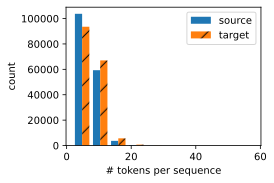

In [5]:
# 定义函数：绘制两个列表长度对的直方图
# @save
def show_list_len_pair_hist(legend, xlabel, ylabel, xlist, ylist):
    """绘制列表长度对的直方图"""
    # 设置图像大小
    d2l.set_figsize()

    # 绘制直方图
    # xlist 和 ylist 的长度分布分别用不同的直方图表示
    _, _, patches = d2l.plt.hist(
        [[len(l) for l in xlist], [len(l) for l in ylist]])

    # 设置 x 轴和 y 轴的标签
    d2l.plt.xlabel(xlabel)
    d2l.plt.ylabel(ylabel)

    # 为第二个直方图（ylist 的长度分布）设置填充图案
    for patch in patches[1].patches:
        patch.set_hatch('/')

    # 添加图例
    d2l.plt.legend(legend)

# 调用函数，绘制源语言句子和目标语言句子的长度分布直方图
show_list_len_pair_hist(['source', 'target'], '# tokens per sequence',
                        'count', source, target)

## 词表

由于机器翻译数据集由语言对组成，因此我们可以分别为源语言和目标语言构建两个词表。使用单词级词元化时，词表大小将明显大于使用字符级词元化时的词表大小。为了缓解这一问题，这里我们将出现次数少于2次的低频率词元视为相同的未知（unk）词元。除此之外，我们还指定了额外的特定词元，例如在小批量时用于将序列填充到相同长度的填充词元（pad），以及序列的开始词元（bos）和结束词元（eos）。这些特殊词元在自然语言处理任务中比较常用。

In [6]:
src_vocab = d2l.Vocab(source, min_freq=2,
                        reserved_tokens=['<pad>', '<bos>', '<eos>'])
len(src_vocab)

10012

## 加载数据集

回想一下，语言模型中的序列样本都有一个固定的长度，无论这个样本是一个句子的一部分还是跨越了多个句子的一个片断。这个固定长度是由num_steps（时间步数或词元数量）参数指定的。在机器翻译中，每个样本都是由源和目标组成的文本序列对，其中的每个文本序列可能具有不同的长度。

为了提高计算效率，我们仍然可以通过截断（truncation）和 填充（padding）方式实现一次只处理一个小批量的文本序列。假设同一个小批量中的每个序列都应该具有相同的长度num_steps，那么如果文本序列的词元数目少于num_steps时，我们将继续在其末尾添加特定的“<pad>”词元，直到其长度达到num_steps；反之，我们将截断文本序列时，只取其前num_steps 个词元，并且丢弃剩余的词元。这样，每个文本序列将具有相同的长度，以便以相同形状的小批量进行加载。

In [8]:
#@save
def truncate_pad(line, num_steps, padding_token):
    """截断或填充文本序列"""
    if len(line) > num_steps:
        return line[:num_steps]  # 截断
    return line + [padding_token] * (num_steps - len(line))  # 填充

truncate_pad(src_vocab[source[0]], 10, src_vocab['<pad>'])

[47, 4, 1, 1, 1, 1, 1, 1, 1, 1]

现在我们定义一个函数，可以将文本序列转换成小批量数据集用于训练。我们将特定的“<eos>”词元添加到所有序列的末尾，用于表示序列的结束。当模型通过一个词元接一个词元地生成序列进行预测时，生成的“eos”词元说明完成了序列输出工作。此外，我们还记录了每个文本序列的长度，统计长度时排除了填充词元，在稍后将要介绍的一些模型会需要这个长度信息。

In [9]:
#@save
def build_array_nmt(lines, vocab, num_steps):
    """将机器翻译的文本序列转换成小批量"""
    lines = [vocab[l] for l in lines]  # 将单词转换为索引
    lines = [l + [vocab['<eos>']] for l in lines]  # 添加结束符
    array = torch.tensor([truncate_pad(
        l, num_steps, vocab['<pad>']) for l in lines])  # 截断或填充
    valid_len = (array != vocab['<pad>']).type(torch.int32).sum(1)  # 计算有效长度
    return array, valid_len

## 训练模型

定义load_data_nmt函数来返回数据迭代器，以及源语言和目标语言的两种词表。

In [11]:
#@save
def load_data_nmt(batch_size, num_steps, num_examples=600):
    """返回翻译数据集的迭代器和词表"""
    text = preprocess_nmt(read_data_nmt())  # 读取并预处理数据
    source, target = tokenize_nmt(text, num_examples)  # 分词
    src_vocab = d2l.Vocab(source, min_freq=2, reserved_tokens=['<pad>', '<bos>', '<eos>'])  # 构建源语言词汇表
    tgt_vocab = d2l.Vocab(target, min_freq=2, reserved_tokens=['<pad>', '<bos>', '<eos>'])  # 构建目标语言词汇表
    src_array, src_valid_len = build_array_nmt(source, src_vocab, num_steps)  # 处理源语言序列
    tgt_array, tgt_valid_len = build_array_nmt(target, tgt_vocab, num_steps)  # 处理目标语言序列
    data_arrays = (src_array, src_valid_len, tgt_array, tgt_valid_len)  # 组合数据
    data_iter = d2l.load_array(data_arrays, batch_size)  # 创建数据迭代器
    return data_iter, src_vocab, tgt_vocab  # 返回数据迭代器和词汇表

下面我们读出“英语－法语”数据集中的第一个小批量数据。

In [12]:
train_iter, src_vocab, tgt_vocab = load_data_nmt(batch_size=2, num_steps=8)
for X, X_valid_len, Y, Y_valid_len in train_iter:
    print('X:', X.type(torch.int32))
    print('X的有效长度:', X_valid_len)
    print('Y:', Y.type(torch.int32))
    print('Y的有效长度:', Y_valid_len)
    break

X: tensor([[87, 22,  4,  3,  1,  1,  1,  1],
        [13, 15,  4,  3,  1,  1,  1,  1]], dtype=torch.int32)
X的有效长度: tensor([4, 4])
Y: tensor([[177, 176,   4,   3,   1,   1,   1,   1],
        [  0,   4,   3,   1,   1,   1,   1,   1]], dtype=torch.int32)
Y的有效长度: tensor([4, 3])


# 关于编码器-解码器结构

机器翻译是序列转换模型的一个核心问题，其输入和输出都是长度可变的序列。为了处理这种类型的输入和输出，我们可以设计一个包含两个主要组件的架构：第一个组件是一个编码器（encoder）：它接受一个长度可变的序列作为输入，并将其转换为具有固定形状的编码状态。第二个组件是解码器（decoder）：它将固定形状的编码状态映射到长度可变的序列。这被称为编码器-解码器（encoder‐decoder）架构

## 编码器

In [14]:
from torch import nn

#@save
class Encoder(nn.Module):
    """编码器-解码器架构的基本编码器接口"""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)
        
    def forward(self, X, *args):
        raise NotImplementedError

## 解码器

在解码器接口中，新增一个init_state函数，用于将编码器的输出（enc_outputs）转换为编码后的状态。注意，此步骤可能需要额外的输入，例如：输入序列的有效长度。为了逐个地生成长度可变的词元序列，解码器在每个时间步都会将输入（例如：在前一时间步生成的词元）和编码后的状态映射成当前时间步的输出词元。

In [15]:
#@save
class Decoder(nn.Module):
    """编码器-解码器架构的基本解码器接口"""
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)
    def init_state(self, enc_outputs, *args):
        raise NotImplementedError
    def forward(self, X, state):
        raise NotImplementedError

## 合并

“编码器‐解码器”架构包含了一个编码器和一个解码器，并且还拥有可选的额外的参数。在前向传播中，编码器的输出用于生成编码状态，这个状态又被解码器作为其输入的一部分。

In [16]:
#@save
class EncoderDecoder(nn.Module):
    """编码器-解码器架构的基类"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)

# 序列到序列学习（seq2seq）

机器翻译中的输入序列和输出序列都是长度可变的。为了解决这类问题，我们在设计了一个通用的”编码器－解码器“架构。现在我们要使用两个循环神经网络的编码器和解码器，并将其应用于序列到序列（sequence to sequence，seq2seq）类的学习任务。

In [1]:
import collections
import math
import torch
from torch import nn
from d2l import torch as d2l

## 编码器

### 编码器的作用
编码器的作用是将输入序列（例如一个句子）转换成一个固定长度的上下文向量（Context Vector），这个向量可以捕捉输入序列的语义信息。编码器通常基于循环神经网络（RNN）、长短期记忆网络（LSTM）或门控循环单元（GRU）实现。

---

### 编码器的数学描述
假设输入序列为 $X = (x_1, x_2, \dots, x_T)$，其中 $x_t$ 是时间步 $t$ 的输入（例如一个词向量），$T$ 是序列长度。

#### 1. **隐藏状态的计算**
编码器通过递归地计算隐藏状态 $h_t$ 来捕捉序列信息。对于 RNN 类模型（如 LSTM 或 GRU），隐藏状态的计算公式为：

$$
h_t = f(h_{t-1}, x_t)
$$

其中：
- $h_t$ 是时间步 $t$ 的隐藏状态。
- $h_{t-1}$ 是前一个时间步的隐藏状态。
- $x_t$ 是时间步 $t$ 的输入。
- $f$ 是一个非线性函数，例如 LSTM 或 GRU 的更新公式。

#### 2. **上下文向量的生成**
编码器的最终目标是生成一个上下文向量 $c$，它通常是对所有隐藏状态的总结。常见的方式有两种：
- **最后隐藏状态**：直接使用最后一个时间步的隐藏状态作为上下文向量：
  $$
  c = h_T
  $$
- **加权隐藏状态**（如注意力机制）：通过对所有隐藏状态加权求和得到上下文向量：
  $$
  c = \sum_{t=1}^T \alpha_t h_t
  $$
  其中 $\alpha_t$ 是注意力权重，表示每个隐藏状态对上下文向量的贡献。

---

### 编码器的输出
编码器的输出是上下文向量 $c$，它会被传递给解码器，用于生成目标序列。上下文向量 $c$ 包含了输入序列的语义信息，是解码器生成输出的关键。

In [3]:
#@save
class Seq2SeqEncoder(d2l.Encoder):
    """用于序列到序列学习的循环神经网络编码器"""
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers, dropout=0, **kwargs):
        super(Seq2SeqEncoder, self).__init__(**kwargs)
        # 嵌入层：将输入的离散符号（如单词索引）映射为连续向量
        self.embedding = nn.Embedding(vocab_size, embed_size)
        # GRU 层：对序列进行编码
        self.rnn = nn.GRU(embed_size, num_hiddens, num_layers, dropout=dropout)

    def forward(self, X, *args):
        # 输入 X 的形状：(batch_size, num_steps)
        # 嵌入层将 X 转换为形状：(batch_size, num_steps, embed_size)
        X = self.embedding(X)
        # 调整维度，将时间步放在第一个维度，以满足 GRU 的输入要求
        # 调整后的形状：(num_steps, batch_size, embed_size)
        X = X.permute(1, 0, 2)
        # 将输入传递给 GRU，得到输出和最终隐藏状态
        # output 的形状：(num_steps, batch_size, num_hiddens)
        # state 的形状：(num_layers, batch_size, num_hiddens)
        output, state = self.rnn(X)
        # 返回输出和最终隐藏状态
        return output, state

下面，我们实例化上述编码器的实现：我们使用一个两层门控循环单元编码器，其隐藏单元数为16。给定一小批量的输入序列X（批量大小为4，时间步为7）。在完成所有时间步后，最后一层的隐状态的输出是一个张量（output由编码器的循环层返回），其形状为（时间步数，批量大小，隐藏单元数）。

In [4]:
encoder = Seq2SeqEncoder(vocab_size=10, embed_size=8, num_hiddens=16,
                        num_layers=2)
encoder.eval()
X = torch.zeros((4, 7), dtype=torch.long)
output, state = encoder(X)
output.shape

torch.Size([7, 4, 16])

由于这里使用的是门控循环单元，所以在最后一个时间步的多层隐状态的形状是（隐藏层的数量，批量大小，隐藏单元的数量）。如果使用长短期记忆网络，state中还将包含记忆单元信息。

In [5]:
state.shape

torch.Size([2, 4, 16])

## 解码器

In [6]:
class Seq2SeqDecoder(d2l.Decoder):
    """用于序列到序列学习的循环神经网络解码器"""
    
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers, dropout=0, **kwargs):
        """
        初始化Seq2Seq解码器
        
        参数:
        - vocab_size: 词汇表大小
        - embed_size: 词嵌入维度
        - num_hiddens: 隐藏层维度
        - num_layers: RNN层数
        - dropout: Dropout概率
        """
        super(Seq2SeqDecoder, self).__init__(**kwargs)
        
        # 词嵌入层，将输入的词索引转换为词向量
        self.embedding = nn.Embedding(vocab_size, embed_size)
        
        # GRU层，用于处理输入序列和上下文信息
        self.rnn = nn.GRU(embed_size + num_hiddens, num_hiddens, num_layers, dropout=dropout)
        
        # 全连接层，将GRU的输出映射到词汇表大小
        self.dense = nn.Linear(num_hiddens, vocab_size)
    
    def init_state(self, enc_outputs, *args):
        """
        初始化解码器的初始状态
        
        参数:
        - enc_outputs: 编码器的输出，通常包含编码器的隐藏状态
        
        返回:
        - 解码器的初始状态
        """
        return enc_outputs[1]  # 返回编码器的隐藏状态作为解码器的初始状态
    
    def forward(self, X, state):
        """
        前向传播
        
        参数:
        - X: 输入序列，形状为(batch_size, num_steps)
        - state: 解码器的初始状态
        
        返回:
        - output: 解码器的输出，形状为(batch_size, num_steps, vocab_size)
        - state: 解码器的最终状态
        """
        # 将输入序列X通过词嵌入层转换为词向量，形状变为(batch_size, num_steps, embed_size)
        X = self.embedding(X).permute(1, 0, 2)  # 调整维度为(num_steps, batch_size, embed_size)
        
        # 广播上下文向量，使其与X的形状匹配
        context = state[-1].repeat(X.shape[0], 1, 1)  # 形状变为(num_steps, batch_size, num_hiddens)
        
        # 将词向量和上下文向量拼接在一起
        X_and_context = torch.cat((X, context), 2)  # 形状变为(num_steps, batch_size, embed_size + num_hiddens)
        
        # 通过GRU层处理拼接后的输入
        output, state = self.rnn(X_and_context, state)  # output形状为(num_steps, batch_size, num_hiddens)
        
        # 通过全连接层将GRU的输出映射到词汇表大小
        output = self.dense(output).permute(1, 0, 2)  # 形状变为(batch_size, num_steps, vocab_size)
        
        # 返回输出和最终状态
        return output, state

# 实例化解码器
decoder = Seq2SeqDecoder(vocab_size=10, embed_size=8, num_hiddens=16, num_layers=2)
decoder.eval()  # 设置为评估模式

# 假设encoder是编码器，X是输入序列
state = decoder.init_state(encoder(X))  # 初始化解码器的状态

# 前向传播
output, state = decoder(X, state)

# 输出形状
print(output.shape, state.shape)  # 输出output和state的形状

torch.Size([4, 7, 10]) torch.Size([2, 4, 16])


## 损失函数定义

In [8]:
#@save
def sequence_mask(X, valid_len, value=0):
    """在序列中屏蔽不相关的项"""
    maxlen = X.size(1)
    mask = torch.arange((maxlen), dtype=torch.float32,device=X.device)[None, :] < valid_len[:, None]
    X[~mask] = value
    return X

In [13]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
sequence_mask(X, torch.tensor([1, 2]))

tensor([[1, 0, 0],
        [4, 5, 0]])

还可以使用此函数屏蔽最后几个轴上的所有项。如果愿意，也可以使用指定的非零值来替换这些项。

In [15]:
X = torch.ones(2, 3, 4)
sequence_mask(X, torch.tensor([1, 2]), value=-1)

tensor([[[ 1.,  1.,  1.,  1.],
         [-1., -1., -1., -1.],
         [-1., -1., -1., -1.]],

        [[ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.],
         [-1., -1., -1., -1.]]])

现在可以通过扩展softmax交叉熵损失函数来遮蔽不相关的预测。最初，所有预测词元的掩码都设置为1。一旦给定了有效长度，与填充词元对应的掩码将被设置为0。最后，将所有词元的损失乘以掩码，以过滤掉损失中填充词元产生的不相关预测。

In [16]:
#@save
class MaskedSoftmaxCELoss(nn.CrossEntropyLoss):
    """带遮蔽的softmax交叉熵损失函数"""
    
    def forward(self, pred, label, valid_len):
        """
        前向传播
        
        参数:
        - pred: 模型的预测输出，形状为 (batch_size, num_steps, vocab_size)
        - label: 真实标签，形状为 (batch_size, num_steps)
        - valid_len: 每个样本的有效长度，形状为 (batch_size,)
        
        返回:
        - weighted_loss: 加权后的损失，形状为 (batch_size,)
        """
        # 创建一个与 label 形状相同的权重矩阵，初始值为 1
        weights = torch.ones_like(label)
        
        # 使用 sequence_mask 函数根据 valid_len 生成遮蔽矩阵
        # 遮蔽矩阵中，有效部分为 1，填充部分为 0
        weights = sequence_mask(weights, valid_len)
        
        # 设置损失函数的 reduction 为 'none'，即不进行求和或平均，返回每个样本的损失
        self.reduction = 'none'
        
        # 调用父类 nn.CrossEntropyLoss 的 forward 方法计算未加权的损失
        # pred.permute(0, 2, 1) 将 pred 的形状从 (batch_size, num_steps, vocab_size) 调整为 (batch_size, vocab_size, num_steps)
        # 这是为了满足 nn.CrossEntropyLoss 的输入要求：pred 的形状应为 (batch_size, num_classes, num_steps)
        unweighted_loss = super(MaskedSoftmaxCELoss, self).forward(
            pred.permute(0, 2, 1), label)
        
        # 将未加权的损失与遮蔽矩阵相乘，遮蔽填充部分的损失
        weighted_loss = (unweighted_loss * weights).mean(dim=1)
        
        # 返回加权后的损失，形状为 (batch_size,)
        return weighted_loss

我们可以创建三个相同的序列来进行代码健全性检查，然后分别指定这些序列的有效长度为4、2和0。结果就是，第一个序列的损失应为第二个序列的两倍，而第三个序列的损失应为零。

In [17]:
loss = MaskedSoftmaxCELoss()
loss(torch.ones(3, 4, 10), torch.ones((3, 4), dtype=torch.long),
    torch.tensor([4, 2, 0]))

tensor([2.3026, 1.1513, 0.0000])

## 训练

在下面的循环训练过程中，特定的序列开始词元“bos”和原始的输出序列（不包括序列结束词元“eos”拼接在一起作为解码器的输入。这被称为强制教学（teacher forcing），因为原始的输出序列（词元的标签）被送入解码器。或者，将来自上一个时间步的预测得到的词元作为解码器的当前输入。

In [19]:
#@save
def train_seq2seq(net, data_iter, lr, num_epochs, tgt_vocab, device):
    """
    训练序列到序列模型

    参数:
    - net: Seq2Seq 模型
    - data_iter: 数据迭代器
    - lr: 学习率
    - num_epochs: 训练轮数
    - tgt_vocab: 目标语言的词汇表
    - device: 训练设备 (如 'cuda' 或 'cpu')
    """
    # 定义 Xavier 初始化权重的函数
    def xavier_init_weights(m):
        """
        使用 Xavier 初始化权重
        """
        if type(m) == nn.Linear:
            # 对全连接层使用 Xavier 均匀初始化
            nn.init.xavier_uniform_(m.weight)
        if type(m) == nn.GRU:
            # 对 GRU 层的权重进行 Xavier 初始化
            for param in m._flat_weights_names:
                if "weight" in param:
                    nn.init.xavier_uniform_(m._parameters[param])

    # 应用 Xavier 初始化到整个网络
    net.apply(xavier_init_weights)
    # 将模型移动到指定设备
    net.to(device)

    # 定义优化器和损失函数
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = MaskedSoftmaxCELoss()  # 使用带掩码的交叉熵损失函数

    # 将模型设置为训练模式
    net.train()

    # 创建动画对象用于绘制训练过程中的损失曲线
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[10, num_epochs])

    # 开始训练过程
    for epoch in range(num_epochs):
        # 创建计时器和累加器
        timer = d2l.Timer()
        metric = d2l.Accumulator(2)  # 用于累加训练损失总和和词元数量

        # 遍历数据迭代器中的每个批次
        for batch in data_iter:
            optimizer.zero_grad()
            # 将批次数据移动到指定设备
            X, X_valid_len, Y, Y_valid_len = [x.to(device) for x in batch]

            # 创建解码器的初始输入，包含目标语言的开始符 '<bos>'
            bos = torch.tensor([tgt_vocab['<bos>']] * Y.shape[0],
                               device=device).reshape(-1, 1)
            dec_input = torch.cat([bos, Y[:, :-1]], 1)  # 强制教学

            # 前向传播
            Y_hat, _ = net(X, dec_input, X_valid_len)

            # 计算损失
            l = loss(Y_hat, Y, Y_valid_len)

            # 反向传播
            l.sum().backward()  # 对损失函数的标量进行反向传播

            # 梯度裁剪，防止梯度爆炸
            d2l.grad_clipping(net, 1)

            # 更新参数
            num_tokens = Y_valid_len.sum()
            optimizer.step()

            # 累加损失和词元数量
            with torch.no_grad():
                metric.add(l.sum(), num_tokens)

        # 每 10 个 epoch 绘制一次损失曲线
        if (epoch + 1) % 10 == 0:
            animator.add(epoch + 1, (metric[0] / metric[1],))

        # 打印训练信息
        print(f'loss {metric[0] / metric[1]:.3f}, {metric[1] / timer.stop():.1f} '
              f'tokens/sec on {str(device)}')

现在，在机器翻译数据集上，我们可以创建和训练一个循环神经网络“编码器－解码器”模型用于序列到序列的学习。

loss 0.019, 8570.9 tokens/sec on cuda:0


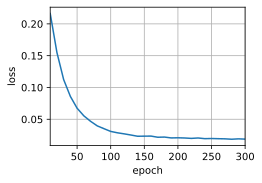

In [20]:
embed_size, num_hiddens, num_layers, dropout = 32, 32, 2, 0.1
batch_size, num_steps = 64, 10
lr, num_epochs, device = 0.005, 300, d2l.try_gpu()

train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)
encoder = Seq2SeqEncoder(len(src_vocab), embed_size, num_hiddens, num_layers,
                        dropout)
decoder = Seq2SeqDecoder(len(tgt_vocab), embed_size, num_hiddens, num_layers,
                        dropout)
net = d2l.EncoderDecoder(encoder, decoder)
train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

## 预测

In [21]:
#@save
def predict_seq2seq(net, src_sentence, src_vocab, tgt_vocab, num_steps,
                    device, save_attention_weights=False):
    """
    使用序列到序列模型进行预测

    参数:
    - net: 训练好的 Seq2Seq 模型
    - src_sentence: 输入的源句子，是一个字符串
    - src_vocab: 源语言的词汇表
    - tgt_vocab: 目标语言的词汇表
    - num_steps: 目标序列的最大长度
    - device: 运行设备（如 'cuda' 或 'cpu'）
    - save_attention_weights: 是否保存注意力权重，默认为 False
    """
    # 在预测时将 net 设置为评估模式
    net.eval()

    # 将输入句子转换为小写，并按空格分割成单词
    # 使用源语言词汇表将单词映射为索引，并在句子末尾添加结束符 '<eos>' 的索引
    src_tokens = src_vocab[src_sentence.lower().split(' ')] + [src_vocab['<eos>']]

    # 计算源句子的有效长度，并将其转换为张量
    enc_valid_len = torch.tensor([len(src_tokens)], device=device)

    # 使用 d2l.truncate_pad 函数将源句子的长度截断或填充到 num_steps
    # 如果句子长度超过 num_steps，则截断；如果不足，则用填充符 '<pad>' 填充
    src_tokens = d2l.truncate_pad(src_tokens, num_steps, src_vocab['<pad>'])

    # 将源句子的索引转换为张量，并添加批量轴（dim=0），使其形状为 (1, num_steps)
    enc_X = torch.unsqueeze(torch.tensor(src_tokens, dtype=torch.long, device=device), dim=0)

    # 将处理后的源句子输入编码器，得到编码器的输出 enc_outputs
    enc_outputs = net.encoder(enc_X, enc_valid_len)

    # 使用编码器的输出初始化解码器的状态
    dec_state = net.decoder.init_state(enc_outputs, enc_valid_len)

    # 初始化解码器的输入，使用目标语言的起始符 '<bos>'
    dec_X = torch.unsqueeze(torch.tensor([tgt_vocab['<bos>']], dtype=torch.long, device=device), dim=0)

    # 初始化输出序列和注意力权重序列
    output_seq, attention_weight_seq = [], []

    # 循环生成目标序列，直到达到最大长度 num_steps
    for _ in range(num_steps):
        # 将当前解码器的输入 dec_X 和状态 dec_state 输入解码器
        # 得到输出 Y 和新的状态 dec_state
        Y, dec_state = net.decoder(dec_X, dec_state)

        # 使用 Y.argmax(dim=2) 选择具有最高概率的词元作为下一个时间步的输入
        dec_X = Y.argmax(dim=2)

        # 获取预测的词元索引，并将其转换为 Python 的 int 类型
        pred = dec_X.squeeze(dim=0).type(torch.int32).item()

        # 如果保存注意力权重，则将当前时间步的注意力权重添加到 attention_weight_seq 中
        if save_attention_weights:
            attention_weight_seq.append(net.decoder.attention_weights)

        # 如果预测的词元是结束符 '<eos>'，则停止生成
        if pred == tgt_vocab['<eos>']:
            break

        # 将预测的词元索引添加到输出序列中
        output_seq.append(pred)

    # 将输出序列的索引转换为目标语言的单词，并用空格连接成一个字符串
    output_sentence = ' '.join(tgt_vocab.to_tokens(output_seq))

    # 返回生成的目标句子和注意力权重序列（如果保存了注意力权重）
    return output_sentence, attention_weight_seq

## 预测序列的评估

### **1. BLEU（Bilingual Evaluation Understudy）**
BLEU 是最常用的自动评估指标之一，主要用于机器翻译和文本生成任务。它通过比较生成文本（候选文本）和参考文本（人工标注的标准答案）之间的 n-gram 重叠度来评估生成质量。

#### **核心思想**
- 计算生成文本和参考文本之间的 n-gram 精度（n 通常取 1 到 4）。
- 引入 brevity penalty（短句惩罚）来惩罚过短的生成结果。

#### **计算公式**
1. **n-gram 精度**：
   $$
   P_n = \frac{\sum_{\text{candidate}} \text{count}_{\text{clip}}(n\text{-gram})}{\sum_{\text{candidate}} \text{count}(n\text{-gram})}
   $$
   - $\text{count}_{\text{clip}}(n\text{-gram})$ 是 n-gram 在生成文本和参考文本中的最小出现次数。
   - $ \text{count}(n\text{-gram})$ 是 n-gram 在生成文本中的总出现次数。

2. **Brevity Penalty（短句惩罚）**：
   $$
   BP = \begin{cases}
   1 & \text{if } l_{\text{candidate}} > l_{\text{reference}} \\
   e^{1 - l_{\text{reference}} / l_{\text{candidate}}} & \text{otherwise}
   \end{cases}
   $$
   - $l_{\text{candidate}}$ 是生成文本的长度。
   - $l_{\text{reference}}$ 是参考文本的长度。

3. **BLEU 分数**：
   $$
   BLEU = BP \cdot \exp\left(\sum_{n=1}^N w_n \log P_n\right)
   $$
   - $w_n$ 是 n-gram 的权重（通常取均匀权重，即 $w_n = 1/N$）。
   - $N$ 是 n-gram 的最大长度（通常取 4）。

#### **优点**
- 简单高效，易于计算。
- 与人类评价相关性较高，尤其在机器翻译任务中。

#### **缺点**
- 无法捕捉语义相似性。
- 对短文本的评估可能不够准确。
- 对词序变化的敏感度较低。

---

### **2. ROUGE（Recall-Oriented Understudy for Gisting Evaluation）**
ROUGE 主要用于文本摘要任务，侧重于召回率（Recall），即生成文本中有多少内容与参考文本重叠。

#### **常见变体**
- **ROUGE-N**：计算 n-gram 的重叠率。
  $$
  ROUGE\text{-}N = \frac{\sum_{\text{reference}} \text{count}_{\text{match}}(n\text{-gram})}{\sum_{\text{reference}} \text{count}(n\text{-gram})}
  $$
- **ROUGE-L**：基于最长公共子序列（LCS）计算。
  $$
  ROUGE\text{-}L = \frac{LCS(\text{candidate}, \text{reference})}{\text{length of reference}}
  $$

#### **优点**
- 适合评估长文本生成任务。
- 强调召回率，适合摘要任务。

#### **缺点**
- 对生成文本的流畅性评估不足。
- 无法捕捉语义多样性。

---

### **3. METEOR（Metric for Evaluation of Translation with Explicit ORdering）**
METEOR 是对 BLEU 的改进，引入了词形还原、同义词匹配和对词序的惩罚机制。

#### **核心思想**
- 使用精确率（Precision）和召回率（Recall）的调和平均（F-score）。
- 引入惩罚因子（Penalty）来惩罚词序不一致的情况。

#### **计算公式**
$$
METEOR = (1 - \text{Penalty}) \cdot F\text{-score}
$$
- $F\text{-score}$ 是精确率和召回率的调和平均。
- $\text{Penalty}$ 是基于词序变化的惩罚因子。

#### **优点**
- 考虑了词形变化和同义词。
- 对词序变化更敏感。

#### **缺点**
- 计算复杂度较高。
- 需要额外的语言学资源（如同义词库）。

---

### **4. Perplexity（困惑度）**
困惑度是语言模型的内部评估指标，用于衡量模型对测试数据的预测能力。

#### **计算公式**
$$
PP(W) = P(w_1, w_2, \dots, w_N)^{-\frac{1}{N}}
$$
- $W$ 是测试集的词序列。
- $P(w_1, w_2, \dots, w_N)$ 是模型对序列的概率估计。

#### **优点**
- 直接反映模型的语言建模能力。
- 计算简单，适合模型调优。

#### **缺点**
- 无法直接反映生成文本的质量。
- 对生成任务的评估能力有限。

---

### **5. Human Evaluation（人工评估）**
尽管自动评估指标（如 BLEU、ROUGE）非常有用，但人工评估仍然是评估生成文本质量的黄金标准。

#### **常见维度**
- **流畅性**：生成文本是否通顺、自然。
- **相关性**：生成文本是否与输入或任务相关。
- **多样性**：生成文本是否具有多样性，避免重复。
- **信息量**：生成文本是否包含足够的信息。

#### **优点**
- 能够捕捉语义和上下文信息。
- 评估结果更贴近实际应用。

#### **缺点**
- 成本高，耗时长。
- 可能存在主观偏差。

---

### **总结**
| 指标       | 适用场景           | 优点                                   | 缺点                                   |
|------------|--------------------|----------------------------------------|----------------------------------------|
| BLEU       | 机器翻译、文本生成 | 简单高效，与人类评价相关性较高         | 无法捕捉语义，对短文本评估不准确       |
| ROUGE      | 文本摘要           | 强调召回率，适合长文本                 | 对流畅性评估不足                       |
| METEOR     | 机器翻译           | 考虑词形变化和同义词，对词序敏感       | 计算复杂度高，需要额外资源             |
| Perplexity | 语言模型评估       | 直接反映模型能力，适合调优             | 无法直接评估生成质量                   |
| 人工评估   | 所有生成任务       | 最贴近实际应用，能捕捉语义和上下文     | 成本高，耗时长，可能存在主观偏差       |


In [22]:
import math
import collections

def bleu(pred_seq, label_seq, k): #@save
    """计算BLEU"""
    # 将预测序列和标签序列按空格分割成单词列表
    pred_tokens, label_tokens = pred_seq.split(' '), label_seq.split(' ')
    len_pred, len_label = len(pred_tokens), len(label_tokens)
    
    # 计算惩罚项，防止预测序列长度与标签序列长度差异过大
    score = math.exp(min(0, 1 - len_label / len_pred))
    
    # 遍历从1到k阶的n-gram
    for n in range(1, k + 1):
        # 初始化匹配数量和标签序列的n-gram计数器
        num_matches, label_subs = 0, collections.defaultdict(int)
        
        # 遍历标签序列的所有n-gram，并统计它们的出现次数
        for i in range(len_label - n + 1):
            label_subs[' '.join(label_tokens[i: i + n])] += 1
        
        # 遍历预测序列的所有n-gram，统计匹配数量
        for i in range(len_pred - n + 1):
            # 如果当前n-gram在标签序列中存在，则匹配数量加1，并减少对应的计数
            if label_subs[' '.join(pred_tokens[i: i + n])] > 0:
                num_matches += 1
                label_subs[' '.join(pred_tokens[i: i + n])] -= 1
        
        # 计算当前阶数n-gram的匹配分数，并累乘到总分数中
        # 使用递减的权重（1/2^n）来平衡不同阶数的贡献
        score *= math.pow(num_matches / (len_pred - n + 1), math.pow(0.5, n))
    
    # 返回最终的BLEU分数
    return score

利用训练好的循环神经网络“编码器－解码器”模型，将几个英语句子翻译成法语，并计算BLEU的最终结果。

In [23]:
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']
for eng, fra in zip(engs, fras):
    translation, attention_weight_seq = predict_seq2seq(
        net, eng, src_vocab, tgt_vocab, num_steps, device)
    print(f'{eng} => {translation}, bleu {bleu(translation, fra, k=2):.3f}')

go . => va !, bleu 1.000
i lost . => j'ai perdu ., bleu 1.000
he's calm . => il est <unk> <unk> bien chercher tom ., bleu 0.376
i'm home . => je suis détendu ., bleu 0.512
